In [1]:
# Importing libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# (1) Problem (case study)

# The objective of this data is to understand customer demographics and buying behavior. 
# For that, I am going to use predictive analytics to analyze the most profitable customers. 
# The ultimate goal is take targeted actions to increase profitable customer response, retention, and growth.

In [3]:
# (2) Getting Data

# Importing file
df = pd.read_csv(r"C:\Users\joaoa\Desktop\Ironhack\Labs\lab-customer-analysis-final-round\files_for_lab\csv_files\marketing_customer_analysis.csv")

In [4]:
# (3) Cleaning/Wrangling/EDA

# Standardizing columns names
cols = []
for i in range(len(df.columns)):
    cols.append(df.columns[i].lower().replace(" ","_"))
df.columns = cols

# Checking null values
print("Total NaN values:", df.isna().sum().sum())

# Dropping duplicates if any
df = df.drop_duplicates()

Total NaN values: 0


In [5]:
# Checking unique values
print("state unique values:", df["state"].unique())
print("response unique values:", df["response"].unique())
print("coverage unique values:", df["coverage"].unique())
print("education unique values:", df["education"].unique())
print("employmentstatus unique values:", df["employmentstatus"].unique())
print("gender unique values:", df["gender"].unique())
print("number_of_open_complaints unique values:", df["number_of_open_complaints"].unique())
print("number_of_policies unique values:", df["number_of_policies"].unique())
print("location_code unique values:", df["location_code"].unique())
print("marital_status unique values:", df["marital_status"].unique())
print("policy_type unique values:", df["policy_type"].unique())
print("policy unique values:", df["policy"].unique())
print("renew_offer_type unique values:", df["renew_offer_type"].unique())
print("sales_channel unique values:", df["sales_channel"].unique())
print("vehicle_class unique values:", df["vehicle_class"].unique())
print("vehicle_size unique values:", df["vehicle_size"].unique())

state unique values: ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response unique values: ['No' 'Yes']
coverage unique values: ['Basic' 'Extended' 'Premium']
education unique values: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
employmentstatus unique values: ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
gender unique values: ['F' 'M']
number_of_open_complaints unique values: [0 2 1 3 5 4]
number_of_policies unique values: [1 8 2 7 9 4 3 6 5]
location_code unique values: ['Suburban' 'Rural' 'Urban']
marital_status unique values: ['Married' 'Single' 'Divorced']
policy_type unique values: ['Corporate Auto' 'Personal Auto' 'Special Auto']
policy unique values: ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
renew_offer_type unique values: ['Offer1' 'Offer3' 'Offer2' 'Offer4']
sales_channel unique values: ['Agent' 'Call Center' 'Web' 'Branch']
vehicle_class unique

In [6]:
# Checking min values and max values
print("Min of customer_lifetime_value:", min(df["customer_lifetime_value"]))
print("Max of customer_lifetime_value:", max(df["customer_lifetime_value"]))
print("Min of income:", min(df["income"]))
print("Max of income:", max(df["income"]))
print("Min of monthly_premium_auto:", min(df["monthly_premium_auto"]))
print("Max of monthly_premium_auto:", max(df["monthly_premium_auto"]))
print("Min of months_since_last_claim:", min(df["months_since_last_claim"]))
print("Max of months_since_last_claim:", max(df["months_since_last_claim"]))
print("Min of months_since_policy_inception:", min(df["months_since_policy_inception"]))
print("Max of months_since_policy_inception:", max(df["months_since_policy_inception"]))
print("Min of total_claim_amount:", min(df["total_claim_amount"]))
print("Max of total_claim_amount:", max(df["total_claim_amount"]))

Min of customer_lifetime_value: 1898.007675
Max of customer_lifetime_value: 83325.38119
Min of income: 0
Max of income: 99981
Min of monthly_premium_auto: 61
Max of monthly_premium_auto: 298
Min of months_since_last_claim: 0
Max of months_since_last_claim: 35
Min of months_since_policy_inception: 0
Max of months_since_policy_inception: 99
Min of total_claim_amount: 0.099007
Max of total_claim_amount: 2893.239678


In [7]:
# Creating a categorical dataframe
categorical = df.select_dtypes(include = object)
categorical

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [8]:
# Creating a numerical dataframe
numerical = df.select_dtypes(include=np.number)
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


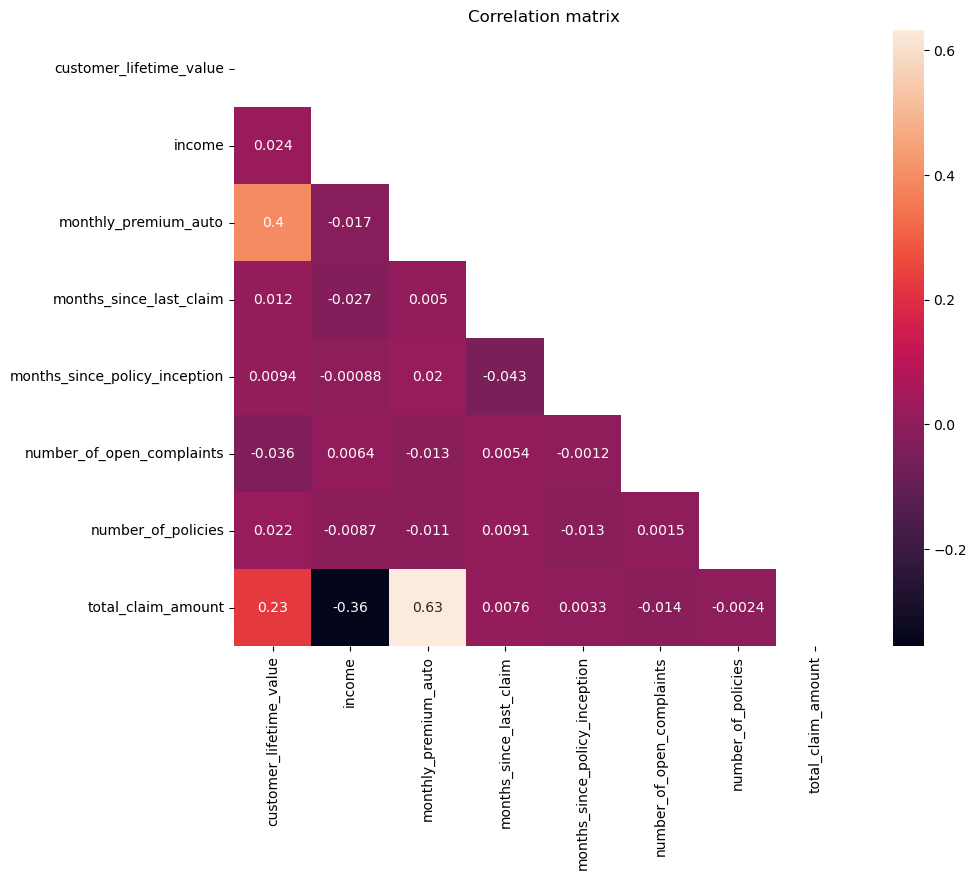

In [9]:
# Creating a new dataframe with correlations
correlations_matrix = numerical.corr()

# Checking the multicollinearity between the features
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlations_matrix, mask = mask, annot = True)
plt.title("Correlation matrix")
plt.show()

In [10]:
# (4) Processing Data

# Splitting X-Y
Y = df["total_claim_amount"]
X = df.drop(["total_claim_amount", "customer"], axis = 1)

# Normalizing X numerical values
num_X = X.select_dtypes(include=np.number)
scaler = MinMaxScaler() 
normalized_X = scaler.fit_transform(num_X) 
normalized_X = pd.DataFrame(normalized_X, columns = num_X.columns)

# Creating a new dataframe with X categorical values
categ_X = X.select_dtypes(include = object)

# One hot enconding
dummies_X = pd.get_dummies(categ_X, drop_first = False)

# Standardizing columns names
cols2 = []
for i in range(len(dummies_X.columns)):
    cols2.append(dummies_X.columns[i].lower().replace(" ","_"))
dummies_X.columns = cols2

# Concatenating numerical and categorical dataframes
X = pd.concat([normalized_X, dummies_X], axis = 1)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.29, random_state = 0)

In [11]:
# (5) Modeling

# Creating the linear model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, Y_train)

# Predicting the test set results
Y_predictions = model.predict(X_test)

In [12]:
# (6) Model Validation

# Model descriptors
r2 = r2_score(Y_test, Y_predictions)
mse = mean_squared_error(Y_test, Y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_predictions)
print("Model descriptors regarding Y predictions and Y test:")
print("R2 value is =", round(r2, 4))
print("The mean squared error of the model is =", round(mse, 2))
print("The root mean squared error of the model is =", round(rmse, 2))
print("The mean absolute error of the model is =", round(mae, 2))

Model descriptors regarding Y predictions and Y test:
R2 value is = 0.7656
The mean squared error of the model is = 19940.61
The root mean squared error of the model is = 141.21
The mean absolute error of the model is = 95.66


In [13]:
# (7) Reporting

# Presenting results
print("Intercept value:", model.intercept_)
coefficients = pd.DataFrame(zip(X_train.columns, model.coef_))
coefficients.columns = ["Variables", "Coefficients"]
coefficients

Intercept value: -96853690260063.83


,Variables,Coefficients
0,customer_lifetime_value,6.672101e+00
1,income,-2.483241e+01
2,monthly_premium_auto,1.138317e+03
3,months_since_last_claim,7.398310e+00
4,months_since_policy_inception,-2.260967e+00
...,...,...
118,vehicle_class_sports_car,2.959395e+14
119,vehicle_class_two-door_car,2.959395e+14
120,vehicle_size_large,-1.695517e+15
121,vehicle_size_medsize,-1.695517e+15
